# step1: 了解公式
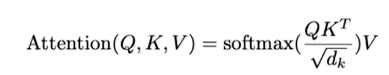

# step2: 开始代码 

解析
这段代码实现了一个基础版的自注意力机制（self-attention）模型。

以下是对代码逐行解读：
1-3行:

```python
import math
import torch
import torch.nn as nn
```

这些行导入了必要的Python库
`math`库用于数学运算，

`torch`是PyTorch库，它是一个机器学习库，用于深度学习模型的训练和推理。

`torch.nn`是PyTorch的神经网络模块，提供了很多神经网络的层和常用的操作。

5-6行:
```python

class SelfattentionV1(nn.Module):    
    def __init__(self, hidden_dim: int = 728) -> None:
```
        
这里定义了一个名为`SelfattentionV1`的类，该类继承自`nn.Module`，这是所有PyTorch神经网络模块的基类。

类初始化函数`__init__`接受一个参数`hidden_dim`，用来指定隐藏层的维度，默认值为728。

7行:
```python        
super().__init__()
```

这行代码调用了基类`nn.Module`的构造函数，是初始化操作的一个标准步骤。

8行:
```python        
self.hidden_dim = hidden_dim
```

这行代码将传入的`hidden_dim`保存在类的成员变量中，供后续的代码使用。

10-12行:
```python        
self.querry_proj = nn.Linear(hidden_dim, hidden_dim)        
self.key_proj = nn.Linear(hidden_dim, hidden_dim)        
self.value_proj = nn.Linear(hidden_dim, hidden_dim)
```

这里定义了三个线性层（也就是全连接层），分别用于计算查询（query）、键（key）和值（value）。

每个线性层都将输入的维度从`hidden_dim`映射到`hidden_dim`，即不改变维度。

14-15行:
```python    
def forward(self, x):        
    #x shape is :(batch, size_len, hidden_dim)
```

定义了模型的前向传播函数`forward`，它接受一个输入张量`x`。

`x`的形状预期为(batch_size, sequence_length, hidden_dim)。

16-18行:
```python        
Q = self.querry_proj(x)        
K = self.key_proj(x)        
V = self.value_proj(x)        
#Q K V shape is :(batch, size_len, hidden_dim)
```

这里利用之前定义的线性层对输入`x`进行变换，

得到查询（Q），键（K）和值（V）。

它们的形状没有改变，依然是(batch_size, sequence_length, hidden_dim)。

21-23行:
```python        
# attention_value 是： （batch, seq, seq）        
attention_value = torch.matmul(            Q, K.transpose(-1,-2)        )
```

这几行执行`Q`矩阵和`K`矩阵的转置后的矩阵乘法，得到注意力值(attention scores)。

先使用`K.transpose(-1, -2)`将`K`的最后两个维度进行转置，以便与`Q`矩阵执行点积。

通过矩阵乘法，计算了attention_value，其形状是

(batch_size, sequence_length, sequence_length)。

26-28行:
```python        
#attention_weight 是： （batch, seq, seq)        
attention_weight = torch.softmaxattention_value / math.sqrt(self.hidden_dim),

dim = -1        )        
print(attention_weight)
```

这里对`attention_value`施加了缩放因子除以`hidden_dim`的平方根（来自“Attention Is All You Need”论文），

用来减少计算query和key点积之后变量的方差，然后应用softmax函数，使得每一行的求和为1，得到注意力权重（attention weights）。

最后，打印出注意力权重。注意力权重的形状未变，有利于下一步的加权和操作。

31-32行:

```python        
# (batch, seq, hidden_dim)        
output = torch.matmul(attention_weight, V)        
return output
```
这里使用注意力权重加权求和值（V）。

通过`torch.matmul(attention_weight, V)`执行矩阵乘法，计算加权的输出值。

此时`output`的形状是(batch_size, sequence_length, hidden_dim)，

与输入`x`形状相同。

34-35行:
```python
X = torch.rand(3, 2, 4)
self_att_net = SelfattentionV1(4)
```
这里创建了一个形状为(3, 2, 4)的随机张量X，即3个样本，每个样本2个序列长度，每个序列长度的特征维度为4。

然后初始化一个隐藏维度为4的`SelfattentionV1`实例。

36行:
```python
self_att_net(X)
```

最后将`X`作为输入传递给自注意力模型进行前向传播计算。

综上所述，这段代码展示了自注意力机制的基础实现，

如何将输入通过查询query、键key、值value变换，

然后根据注意力权重计算输出。

这种机制是许多现代神经网络架构（如Transformer）的基石。

在实际应用中，可以在这个基础上添加诸如多头注意力、层归一化、残差连接等许多其他特性来增强模型性能。

基类nn.Module是什么？

基类nn.Module是PyTorch中所有神经网络模块的基本类。当你创建一个新的神经网络模型时，你通常会通过继承nn.Module来实现你的模型。这个基类提供一些基础功能，比如跟踪模型中的层、参数、保存和加载模型等。

什么是hidden_dim？他是怎么来定义的？默认值为什么为728？

hidden_dim是隐藏单元的维度，它是一个超参数，用以定义模型内部层的大小或复杂度。在上文中，hidden_dim是通过类SelfattentionV1构造函数的参数传入的，即在创建类的对象实例时设定。默认值为728可能没有特别的原因，这可能是代码编写者根据经验设置的一个合理值，或许基于之前在具体数据集上的实验效果决定的。

super是什么意思？怎么用的？

super()函数用于调用基类的方法。在类的方法中调用super()会返回一个代理对象，这个对象能够引用基类的方法，这样就可以调用基类内部定义的方法而不会导致无限递归。在上文代码中的super().__init__()就是在调用nn.Module类的构造函数来正确初始化基类的内部状态。


全连接层（Fully Connected Layer，也称为线性层）


全连接层是一种最基本的神经网络层，也是在传统的多层感知机（Multi-Layer Perceptron, MLP）中广泛使用的层。在全连接层中，每个输入单元都与下一层的每个输出单元连接，每个连接都有一个相关的权重。mathematically，全连接层进行的操作可以表示为：

[ \text{output} = \text{activation}(\mathbf{W} \cdot \mathbf{input} + \mathbf{b}) ]

其中 (\mathbf{W}) 是权重矩阵，(\mathbf{b}) 是偏置向量，(\text{activation}(\cdot)) 是可选的激活函数。

在PyTorch中，全连接层可以通过torch.nn.Linear类来实现，其中需要指定输入和输出的特征数量。例如，nn.Linear(10, 5)将创建一个从10个输入特征到5个输出特征的全连接层。

什么是前向传播函数？

前向传播函数forward是定义在nn.Module子类中的一个特殊方法，它规定了数据通过网络的方式。在模型训练或推理时，它会被自动调用。在这个函数中，你定义了模型的结构以及数据怎样流经这个结构。

x的维度是怎么确定的？

在上文代码的注释中提到，x的预期维度是(batch_size, sequence_length, hidden_dim)。这是由自注意力模型的输入形式决定的。batch_size是每次送入网络的样本数量， sequence_length是序列的长度（例如在处理文本数据时，这通常对应于一句话中的单词数），hidden_dim则是之前定义的隐藏层的维度。这个维度是在模型创建时，通过传入参数指定的，同时也与实际的数据输入相匹配。

softmax的dim 是什么意思？怎么决定用什么？

softmax函数是一种将向量的元素值转换成概率分布的函数。dim参数指定了在哪个维度上应用softmax。在上文中使用torch.softmax的时候，dim=-1意味着softmax会应用在最后一个维度上，正好是序列长度维度（在自注意力机制中，我们期望每个序列长度位置分数的softmax。由于batch和hidden_dim其他两个维度应保持不变，因此dim=-1保证了这一点。通常，我们在哪一个维度上想要获取概率分布，那个维度就会被设置为softmax函数的dim参数。


维度 (d_k) 的计算
在自注意力机制中，有时我们会遇到 (d_k) 这个变量，它通常指的是键（key）的维度，在缩放点积注意力计算中很重要，因为我们通常会将注意力分数除以 (\sqrt{d_k}) 来稳定梯度。

如果 (d_k) 没有明确定义，其取值通常与模型中的隐藏维度 hidden_dim 是一样的，因为在简化模型中，key的转换矩阵通常是正方形的，即它的输入和输出维度相同。但在更复杂的模型（例如Transformer模型）里，(d_k) 会根据模型超参数进行设置，尤其是在使用多头注意力时，每一个头的 (d_k) 可能会是隐藏维度除以头的数量。

计算方式示例：如果模型的隐藏维度是256，并且使用8个头进行多头注意力，那么每个头的 (d_k) 可能就是 (256 / 8 = 32)。

综上所述，(d_k) 的取值不是随意设定的，而是基于模型的构建和设计决策。全连接层的输出维度应该与模型或任务的要求相匹配。当使用全连接层作为注意力模块中的查询（query）、键（key）和值（value）的投影时，这些维度都应事先确定好。 

In [ ]:
### 第一重最简单代码
import math
import torch
import torch.nn as nn

class SelfattentionV1(nn.Module):
    def __init__(self, hidden_dim: int = 728) -> None:
        super().__init__()
        self.hidden_dim = hidden_dim

        self.querry_proj = nn.Linear(hidden_dim, hidden_dim)
        self.key_proj = nn.Linear(hidden_dim, hidden_dim)
        self.value_proj = nn.Linear(hidden_dim, hidden_dim)

    def forward(self, x):
        #x shape is :(batch, size_len, hidden_dim)
        Q = self.querry_proj(x)
        K = self.key_proj(x)
        V = self.value_proj(x)
        #Q K V shape is :(batch, size_len, hidden_dim)


        # attention_value 是： （batch, seq, seq）
        attention_value = torch.matmul(
            Q, K.transpose(-1,-2)
        )

        #attention_weight 是： （batch, seq, seq)
        attention_weight = torch.softmax(
            attention_value/ math.sqrt(self.hidden_dim),
            dim = -1
        )
        print(attention_weight)

        # (batch, seq, hidden_dim)
        output = torch.matmul(attention_weight, V)
        return output
X = torch.rand(3, 2, 4)

self_att_net = SelfattentionV1(4)
self_att_net(X)

tensor([[[0.4982, 0.5018],
         [0.4974, 0.5026]],

        [[0.5076, 0.4924],
         [0.4842, 0.5158]],

        [[0.4880, 0.5120],
         [0.4834, 0.5166]]], grad_fn=<SoftmaxBackward0>)


tensor([[[-0.7893, -0.5008, -0.8059,  0.3949],
         [-0.7893, -0.5010, -0.8060,  0.3950]],

        [[-0.4251, -0.2737, -0.7517,  0.1666],
         [-0.4272, -0.2621, -0.7536,  0.1595]],

        [[-0.3438, -0.1748, -0.6979,  0.1224],
         [-0.3446, -0.1775, -0.6989,  0.1233]]], grad_fn=<UnsafeViewBackward0>)

In [6]:
### 第二重：小网络优化——优化了效率
import math
import torch
import torch.nn as nn

class SelfattentionV2(nn.Module):
    def __init__(self, hidden_dim: int = 728) -> None:
        super().__init__()
        self.hidden_dim = hidden_dim

        self.proj = nn.Linear(hidden_dim, hidden_dim * 3)

        # self.querry_proj = nn.Linear(hidden_dim, hidden_dim)
        # self.key_proj = nn.Linear(hidden_dim, hidden_dim)
        # self.value_proj = nn.Linear(hidden_dim, hidden_dim)

    def forward(self, x):
        #x shape is :(batch, size_len, hidden_dim)
        # QKV shape (batch, seq, hidden_dim* 3)
        QKV = self.proj(x)
        Q, K, V = torch.split(QKV, self.hidden_dim, hidden_dim = -1)

        # Q = self.querry_proj(x)
        # K = self.key_proj(x)
        # V = self.value_proj(x)
        #Q K V shape is :(batch, size_len, hidden_dim)


        # attention_value 是： （batch, seq, seq）
        attention_value = torch.matmul(
            Q, K.transpose(-1,-2)
        )

        #attention_weight 是： （batch, seq, seq)
        attention_weight = torch.softmax(
            attention_value/ math.sqrt(self.hidden_dim),
            dim = -1
        )
        print(attention_weight)

        # (batch, seq, hidden_dim)
        # output = torch.matmul(attention_weight, V)
        output = attention_weight @ V
        return output
X = torch.rand(3, 2, 4)

self_att_net = SelfattentionV1(4)
self_att_net(X)

tensor([[[0.5485, 0.4515],
         [0.5281, 0.4719]],

        [[0.4927, 0.5073],
         [0.4922, 0.5078]],

        [[0.4978, 0.5022],
         [0.4841, 0.5159]]], grad_fn=<SoftmaxBackward0>)


tensor([[[ 0.4405, -0.4308, -0.4967, -0.3142],
         [ 0.4444, -0.4329, -0.5046, -0.3200]],

        [[ 0.4907, -0.4465, -0.5670, -0.4019],
         [ 0.4907, -0.4465, -0.5670, -0.4019]],

        [[ 0.2298, -0.5656, -0.5439, -0.3680],
         [ 0.2274, -0.5641, -0.5390, -0.3684]]], grad_fn=<UnsafeViewBackward0>)

In [30]:
### 第三重：加入一些细节
# 细节1：使用模型的时候会使用drop out 
# 细节2：每一个句子长度是不一样的，需要进行mask 掩码
# 细节3：需要把output 矩阵，output_pojt,矩阵映射（可选）

class slefattentionV3(nn.Module):
    def __init__(self, dim, droupout_rate = 0.1):
        super().__init__()
        self.dim = dim

        self.proj = nn.Linear(dim, dim*3)
        self.attention_dropout = nn.Dropout(self.droupout_rate)

        #可选
        self.output_proj = nn.Linear(dim, dim)
    def forward(slef, x, attention_mask = None):
        QKV = slef.proj(x)
        Q, K, V = torch.split(QKV, self.dim, dim = -1)

        attention_value = Q @ K.transpose(-1, -2)/math.sqrt(slef.dim)
        if attention_mask is None:            
            attention_value = attention_value.marked_fill(
                attention_mask == 0,
                float = "-inf"
            )
        
        attention_weight = torch.softmax(
            attention_weight,
            dim = -1
        )

        attention_weight = slef.attention_dropout(attention_weight)
        attention_result = attention_weight @ V

        out_put = slef.output_proj(attention_result)

X = torch.rand(3, 2, 4)

self_att_net = SelfattentionV1(4)
self_att_net(X)




tensor([[[0.4919, 0.5081],
         [0.4974, 0.5026]],

        [[0.5046, 0.4954],
         [0.4994, 0.5006]],

        [[0.5199, 0.4801],
         [0.5378, 0.4622]]], grad_fn=<SoftmaxBackward0>)


tensor([[[-8.6230e-02,  3.3549e-01, -4.3123e-01, -3.0909e-01],
         [-8.7156e-02,  3.3572e-01, -4.3159e-01, -3.0822e-01]],

        [[ 2.8140e-04,  4.4226e-01, -4.4176e-01, -1.9903e-01],
         [ 2.8556e-03,  4.4375e-01, -4.4086e-01, -1.9829e-01]],

        [[ 1.4999e-01,  5.8385e-01, -4.1191e-01, -1.8120e-01],
         [ 1.5419e-01,  5.7938e-01, -4.1062e-01, -1.8692e-01]]],
       grad_fn=<UnsafeViewBackward0>)